In [1]:
#Libraries needed to implement and simulate quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
from qiskit.providers.basic_provider import BasicProvider # instead of BasicAer
from qiskit.visualization import plot_histogram
#Custem functions to simplify answers
import Our_Qiskit_Functions as oq #a part of the library presented in arXiv:1903.04359v1.

import numpy as np
import math as m
import scipy as sci
import random
import matplotlib.pyplot as plt

#Initialize backends simulators to visualize circuits
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

In [2]:
alpha = 2*m.pi/3
U = np.array([ [ np.cos(alpha) , np.sin(alpha) ],
[ -np.sin(alpha) , np.cos(alpha) ] ])
#---------------------------------------------------
e = 0.5*(-1+m.sqrt(3)*1.0j)
v = 1.0/m.sqrt(2)*np.array( [-1.0j,1] )
#---------------------------------------------------
print('____ Unitary Matrix ____\n',U)
print( '\n U |u> = ',np.dot(U,v))
print( 'e^{2\u03C0i\u03C6} |u> = ',e * v)

____ Unitary Matrix ____
 [[-0.5        0.8660254]
 [-0.8660254 -0.5      ]]

 U |u> =  [ 0.61237244+0.35355339j -0.35355339+0.61237244j]
e^{2πiφ} |u> =  [ 0.61237244+0.35355339j -0.35355339+0.61237244j]


In [3]:
q = QuantumRegister(3,name='q' )
qc= QuantumCircuit(q,name='qc')
#-------------------------------
qc.x( q[1] )
qc.x( q[2] )
print('____ Initial State ____')
oq.Wavefunction(qc)
qc.swap( q[0], q[2] )
oq.QFT_dgr( qc,q,3 )
print('\n____ After QFT\u2020 ____')
oq.Wavefunction(qc)
#======================================
print('\n ____ QFT\u2020 Expression ____')
for k in np.arange( 8 ):
    phase = 1.0/(m.sqrt(8)) * np.exp( -1.0j*m.pi*( (3*k)/4 ) )
    print( 'state: ',oq.Binary(int(k),8),' phase: ',round(phase.real,4)+round(phase.imag,4)*1.0j )


____ Initial State ____
1.0  |011>   

____ After QFT† ____
0.35355  |000>   -0.35355  |100>   0.35355j |010>   -0.35355j |110>   -0.25-0.25j |001>   0.25+0.25j |101>   0.25-0.25j |011>   -0.25+0.25j |111>   

 ____ QFT† Expression ____
state:  [0, 0, 0]  phase:  (0.3536+0j)
state:  [0, 0, 1]  phase:  (-0.25-0.25j)
state:  [0, 1, 0]  phase:  0.3536j
state:  [0, 1, 1]  phase:  (0.25-0.25j)
state:  [1, 0, 0]  phase:  (-0.3536+0j)
state:  [1, 0, 1]  phase:  (0.25+0.25j)
state:  [1, 1, 0]  phase:  -0.3536j
state:  [1, 1, 1]  phase:  (-0.25+0.25j)


In [4]:
n = 3
theta = 0.52
print('Theta = ',theta,' n = ',n,'\n---------------------------')
#===================
state = []
bstate = []
bdec = []
for i in range(2**n):
    state.append(0)
    bstate.append(oq.Binary(i,2**n))
    bc = 0
    for i2 in range(len(bstate[i])):
        bc = bc + ( 1.0/(2**(i2+1)))*bstate[i][i2]
    bdec.append(bc)
#-------------------------------------------------------------
for y in range(2**n):
    for x in range(2**n):
        state[y] = state[y] + 1.0/(2**n) * np.exp( (-2.0j*np.pi*x/(2**n))*(y-2**n*theta) )
#--------------------------------------------------------------
for j in np.arange(2**n):
    print('Probability: ',round( abs(state[j])**2,4 ),' State: ',bstate[j],' Binary Decimal: ',bdec[j])

Theta =  0.52  n =  3 
---------------------------
Probability:  0.0036  State:  [0, 0, 0]  Binary Decimal:  0.0
Probability:  0.0041  State:  [0, 0, 1]  Binary Decimal:  0.125
Probability:  0.0064  State:  [0, 1, 0]  Binary Decimal:  0.25
Probability:  0.0187  State:  [0, 1, 1]  Binary Decimal:  0.375
Probability:  0.9198  State:  [1, 0, 0]  Binary Decimal:  0.5
Probability:  0.0346  State:  [1, 0, 1]  Binary Decimal:  0.625
Probability:  0.0083  State:  [1, 1, 0]  Binary Decimal:  0.75
Probability:  0.0045  State:  [1, 1, 1]  Binary Decimal:  0.875


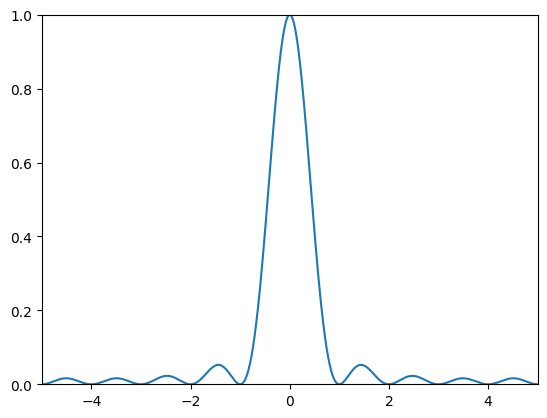

In [5]:
x = []
y = []
n = 3
for k in np.arange( 1000 ):
    if( k != 500 ):
        phi = -5 + k/100.
        x.append( phi )
        y.append( 1/(2**(2*n)) * abs( (-1 + np.exp(2.0j*m.pi*phi) )/(-1 + np.exp(2.0j*m.pi*phi/(2**n))) )**2 )
    else:
        x.append(phi)
        y.append(1)

plt.plot(x,y)
plt.axis([-5,5,0,1])
plt.show()

In [6]:
n = 4
theta = 0.52
print('Theta = ',theta,' n = ',n,'\n---------------------------')
#===================
state = []
bstate = []
bdec = []
for i in range(2**n):
    state.append(0)
    bstate.append(oq.Binary(i,2**n))
    bc = 0
    for i2 in range(len(bstate[i])):
        bc = bc + ( 1.0/(2**(i2+1)))*bstate[i][i2]
    bdec.append(bc)
#-------------------------------------------------------------
for y in range(2**n):
    for x in range(2**n):
        state[y] = state[y] + 1.0/(2**n) * np.exp( (-2.0j*np.pi*x/(2**n))*(y-2**n*theta) )
#--------------------------------------------------------------
for j in np.arange(2**n):
    print('Probability: ',round( abs(state[j])**2,4 ),' State: ',bstate[j],' Binary Decimal: ',bdec[j])

Theta =  0.52  n =  4 
---------------------------
Probability:  0.0028  State:  [0, 0, 0, 0]  Binary Decimal:  0.0
Probability:  0.0028  State:  [0, 0, 0, 1]  Binary Decimal:  0.0625
Probability:  0.0031  State:  [0, 0, 1, 0]  Binary Decimal:  0.125
Probability:  0.0037  State:  [0, 0, 1, 1]  Binary Decimal:  0.1875
Probability:  0.0049  State:  [0, 1, 0, 0]  Binary Decimal:  0.25
Probability:  0.0076  State:  [0, 1, 0, 1]  Binary Decimal:  0.3125
Probability:  0.0144  State:  [0, 1, 1, 0]  Binary Decimal:  0.375
Probability:  0.0424  State:  [0, 1, 1, 1]  Binary Decimal:  0.4375
Probability:  0.7063  State:  [1, 0, 0, 0]  Binary Decimal:  0.5
Probability:  0.1571  State:  [1, 0, 0, 1]  Binary Decimal:  0.5625
Probability:  0.0265  State:  [1, 0, 1, 0]  Binary Decimal:  0.625
Probability:  0.011  State:  [1, 0, 1, 1]  Binary Decimal:  0.6875
Probability:  0.0064  State:  [1, 1, 0, 0]  Binary Decimal:  0.75
Probability:  0.0044  State:  [1, 1, 0, 1]  Binary Decimal:  0.8125
Probability

In [7]:
Prob = [ 0.0028,0.0028,0.0031,0.0037,0.0049,0.0076,0.0144,0.0424,0.7063,0.1571,0.0265,0.011,0.0064,0.0044,0.0035,0.003 ]
Measured = np.zeros( len(Prob) )
trials = 10000
n = 4
#======================================== Simulate measurements on the final system
for t in range(trials):
    M = random.random()
    p = 0
    for s in range( len(Prob) ):
        if( p < M < (p + Prob[s]) ):
            Measured[s] = Measured[s] + 1
        p = p + Prob[s]
#---------------------------------------
MD = {}
for i in range( len(Prob) ):
    state = oq.Binary(int(i),2**n)
    state_str = ''
    for j in range(len(state)):
        state_str = state_str+str(state[j])
    MD[state_str] = int( Measured[i] )
MP = oq.Most_Probable(MD,2)
for mp in range(2):
    MP[0][mp] = MP[0][mp]/trials
#======================================== Compute phi using the most probable state
phi,theta = oq.QPE_phi(MP)
print('\nMost Probable State: |'+str(MP[1][0])+'> Probability: ',round(MP[0][0],5))
print('\nCorresponding \u03A6: ',phi,'\n\nApproximate \u03B8: ',round(theta,5))


Most Probable State: |1000> Probability:  0.6975

Corresponding Φ:  0.3256 

Approximate θ:  0.52035


In [8]:
n = 3
q1 = QuantumRegister(n,name='q1')
q2 = QuantumRegister(1,name='q2')
qc = QuantumCircuit(q1,q2,name='qc')
theta = 0.52
phi = 2*m.pi*theta
#---------------------------------------------------
for i in np.arange(n):
    qc.h(q1[int(i)])
qc.x( q2[0] )
for j in np.arange(n):
    for k in np.arange(2**j):
        qc.cp( phi, q1[int(n-1-j)], q2[0] )
print('\n___ After Control-U Operations ___')
oq.Wavefunction( qc, systems=[n,1] )
#---------------------------------------------------
Phases = [np.exp(4.0j*phi),np.exp(2.0j*phi),np.exp(1.0j*phi)]
print(' ')
for i in np.arange(8):
    state = oq.Binary(int(i),8)
    phase = m.sqrt(1/8)
    for j in np.arange(3):
        if(state[j]==1):
            phase = phase*Phases[j]
    print('State: ',state,' Phase: ',round(phase.real,5)+round(phase.imag,5)*1.0j)


___ After Control-U Operations ___
0.35355  |000>|1>   0.30982+0.17033j |100>|1>   0.34245+0.08793j |010>|1>   0.25773+0.24202j |110>|1>   -0.35077-0.04431j |001>|1>   -0.28603-0.20781j |101>|1>   -0.32873-0.13015j |011>|1>   -0.22536-0.27242j |111>|1>   
 
State:  [0, 0, 0]  Phase:  (0.35355+0j)
State:  [0, 0, 1]  Phase:  (-0.35077-0.04431j)
State:  [0, 1, 0]  Phase:  (0.34245+0.08793j)
State:  [0, 1, 1]  Phase:  (-0.32873-0.13015j)
State:  [1, 0, 0]  Phase:  (0.30982+0.17033j)
State:  [1, 0, 1]  Phase:  (-0.28603-0.20781j)
State:  [1, 1, 0]  Phase:  (0.25773+0.24202j)
State:  [1, 1, 1]  Phase:  (-0.22536-0.27242j)



___ After QFT_dgr ___
0.06024-0.10796j |000>|1>   0.18789+0.10484j |100>|1>   0.10682-0.03031j |010>|1>   -0.11217-0.39534j |110>|1>   0.08478-0.06705j |001>|1>   0.51766+0.65453j |101>|1>   0.13442+0.0157j |011>|1>   0.02037-0.17442j |111>|1>   


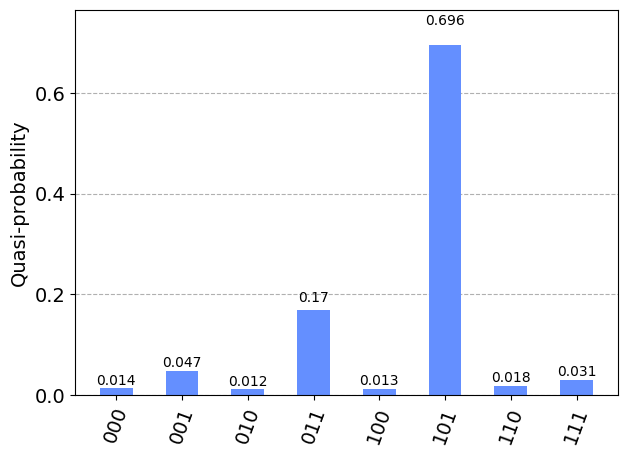

In [9]:
n = 3
q1 = QuantumRegister(n,name='q1')
q2 = QuantumRegister(1,name='q2')
c = ClassicalRegister(n,name='c')
qc = QuantumCircuit(q1,q2,c,name='qc')
theta = 0.666
#---------------------------------------------------
for i in np.arange(n):
    qc.h(q1[int(i)])
qc.x( q2[0] )
phi = 2*m.pi*theta
for j in np.arange(n):
    for k in np.arange(2**j):
        qc.cp( phi, q1[int(n-1-j)], q2[0] )
print('\n___ After QFT_dgr ___')
oq.QFT_dgr( qc,q1,n,swap=True )
oq.Wavefunction( qc, systems=[n,1] )
#---------------------------------------------------
qc.measure(q1,c)
#results = oq.execute(qc, BasicProvider().get_backend('qasm_simulator'), shots=10000).result()
results = oq.execute(qc, S_simulator, shots=10000).result()
plot_histogram({key: value / 10000. for key, value in results.get_counts().items()})

Phases:  [4.3515, 0.0808]

Combined θ:  0.70542


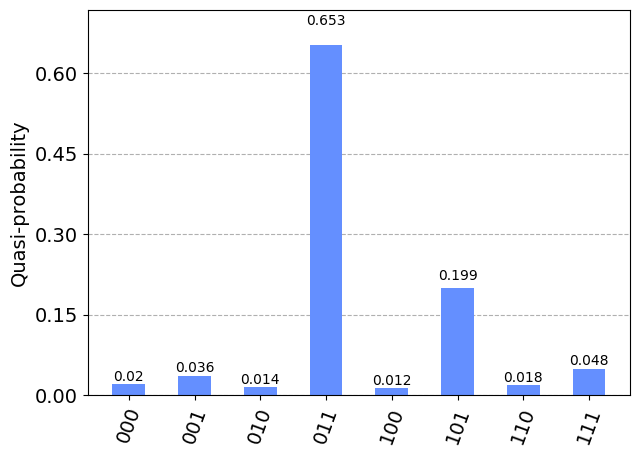

In [10]:
n1 = 3
n2 = 2
phases = []
for p in np.arange( n2 ):
    phases.append( round( 2*m.pi*random.random(),4 ) )
theta = round( sum(phases)/(2*m.pi),5)
if( theta > 1 ):
    theta = round( theta - m.floor(theta),5)
#=================================
q = QuantumRegister(n1,name='q')
qu = QuantumRegister(n2,name='qu')
c = ClassicalRegister(n1,name='c')
qc = QuantumCircuit(q,qu,c,name='qc')
#----------------------------------
for i in np.arange(n1):
    qc.h( q[int(i)] )
for i2 in np.arange(n2):
    qc.x( qu[int(i2)] )
qc.barrier()
for j in np.arange(n1):
    for j2 in np.arange(2**j):
        for j3 in np.arange(n2):
            qc.cp( phases[int(j3)], q[int(n1-1-j)], qu[int(j3)] )
    qc.barrier()

oq.QFT_dgr( qc,q,n1,swap=True )
#---------------------------------------------------
print('Phases: ',phases)
print('\nCombined \u03B8: ',theta)
qc.measure(q,c)
#results = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=10000).result()
results = oq.execute(qc, S_simulator, shots=10000).result()
plot_histogram({key: value / 10000. for key, value in results.get_counts().items()})

In [11]:
print(qc)

      ┌───┐ ░                          ░                                     »
 q_0: ┤ H ├─░──────────────────────────░─────────────────────────────────────»
      ├───┤ ░                          ░                                     »
 q_1: ┤ H ├─░──────────────────────────░──■───────────■───────────■──────────»
      ├───┤ ░                          ░  │           │           │          »
 q_2: ┤ H ├─░──■───────────■───────────░──┼───────────┼───────────┼──────────»
      ├───┤ ░  │P(4.3515)  │           ░  │P(4.3515)  │           │P(4.3515) »
qu_0: ┤ X ├─░──■───────────┼───────────░──■───────────┼───────────■──────────»
      ├───┤ ░              │P(0.0808)  ░              │P(0.0808)             »
qu_1: ┤ X ├─░──────────────■───────────░──────────────■──────────────────────»
      └───┘ ░                          ░                                     »
 c: 3/═══════════════════════════════════════════════════════════════════════»
                                                    

In [12]:
n1 = 5
n2 = 3
phases = []
trials = 10000
for p in np.arange( n2 ):
    phases.append( round( 2*m.pi*random.random(),4 ) )
theta = round( sum(phases)/(2*m.pi),5)
if( theta > 1 ):
    theta = round( theta - m.floor(theta),5)
#================================================================== QPE Circuit
q = QuantumRegister(n1,name='q')
qu = QuantumRegister(n2,name='qu')
c = ClassicalRegister(n1,name='c')
qc = QuantumCircuit(q,qu,c,name='qc')
#-------------------------------------
for i in np.arange(n1):
    qc.h( q[int(i)] )
for i2 in np.arange(n2):
    qc.x( qu[int(i2)] )
for j in np.arange(n1):
    for j2 in np.arange(2**j):
        for j3 in np.arange(n2):
            qc.cp( phases[int(j3)], q[int(n1-1-j)], qu[int(j3)] )
oq.QFT_dgr( qc,q,n1,swap=True )
#==================================================================
print('Phases: ',phases,' Combined \u03B8: ',theta)
qc.measure(q,c)
M = oq.Measurement( qc,systems=[n1,n2],shots=trials,return_M=True,print_M=False )
MP = oq.Most_Probable(M,2)
for mp in np.arange(2):
    MP[0][mp] = MP[0][mp]/trials
phi,theta = oq.QPE_phi(MP)
print('\nMost Probable State: |'+str(MP[1][0])+'> Probability: ',round(MP[0][0],5))
print('\nSecond Most Probable: |'+str(MP[1][1])+'> Probability: ',round(MP[0][1],5))
print('\nCorresponding \u03A6: ',phi,'\n\nApproximate \u03B8: ',round(theta,5))

Phases:  [4.4112, 5.7139, 6.2794]  Combined θ:  0.61086

Most Probable State: |10100> Probability:  0.4843

Second Most Probable: |10011> Probability:  0.3305

Corresponding Φ:  0.4524 

Approximate θ:  0.61086
